In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
df=pd.read_csv('https://github.com/sivakar94/Customer_Complaints/blob/main/check.zip?raw=true', compression='zip', sep=',', quotechar='"')

In [4]:
df

,complaints,Product,target
0,This company refuses to provide me verificatio...,Debt collection,0
1,This complaint is in regards to Square Two Fin...,Debt collection,0
2,Started the refinance of home mortgage process...,Mortgage,1
3,"In XXXX, I and my ex-husband applied for a ref...",Mortgage,1
4,Mortgage was transferred to Nationstar as of X...,Mortgage,1
...,...,...,...
49995,"On XXXX XXXX, XXXX I received two ( 2 ) separa...",Mortgage,1
49996,Bank of America charged a {$35.00} overdraft f...,Bank account or service,3
49997,I called CitiMortgage and asked if there was a...,Mortgage,1
49998,XX/XX/XXXX I was approved on an individual bas...,Debt collection,0


In [5]:
df.Product.value_counts()

Debt collection            17673
Mortgage                   14041
Credit card                 7540
Bank account or service     5782
Student loan                4964
Name: Product, dtype: int64

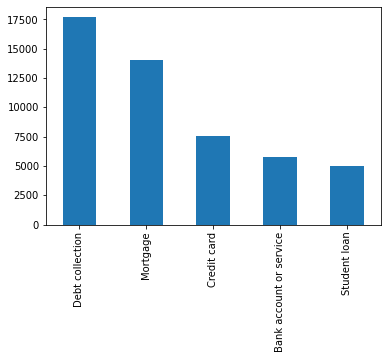

In [6]:
df['Product'].value_counts().plot(kind='bar')

In [7]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=111)

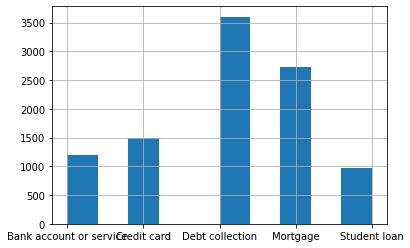

In [8]:
X_test['Product'].hist()

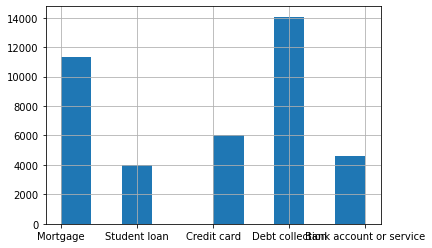

In [9]:
X_train['Product'].hist()

**Stemming** just removes or stems the last few characters of a word, often leading to incorrect meanings and spelling.

Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. Sometimes, the same word can have multiple different Lemmas. We should identify the Part of Speech (POS) tag for the word in that specific context. Here are the examples to illustrate all the differences and use cases:

If you lemmatize the word 'Caring', it would return 'Care'. If you stem, it would return 'Car' and this is erroneous.
If you lemmatize the word 'Stripes' in verb context, it would return 'Strip'. If you lemmatize it in noun context, it would return 'Stripe'. If you just stem it, it would just return 'Strip'.

You would get same results whether you lemmatize or stem words such as walking, running, swimming... to walk, run, swim etc.

Lemmatization is computationally expensive since it involves look-up tables and what not. If you have large dataset and performance is an issue, go with Stemming. Remember you can also add your own rules to Stemming. If accuracy is paramount and dataset isn't humongous, go with Lemmatization.

In [10]:
#stemmer = PorterStemmer()
stemmer = nltk.stem.SnowballStemmer('english')

In [11]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
def tokenize(text):
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
    tokens = map(str.lower, tokens)
    stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
    return stems

In [13]:


vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
train_vectors = vectorizer_tf.fit_transform(X_train.complaints)

In [14]:
train_vectors.A

array([[0.        , 0.06047557, 0.        , ..., 0.        , 0.04351891,
        0.        ],
       [0.        , 0.        , 0.06743804, ..., 0.        , 0.30941001,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05406021,
        0.        ],
       ...,
       [0.        , 0.10077749, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
vectorizer_tf.get_feature_names()[:5]

['abil', 'abl', 'absolut', 'abus', 'accept']

In [16]:
test_vectors = vectorizer_tf.transform(X_test.complaints)

In [17]:
import joblib
joblib.dump(vectorizer_tf, "vectorizer.pkl")

['vectorizer.pkl']

In [18]:
X_train.shape

(40000, 3)

In [19]:
train_df=pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
train_df=pd.concat([train_df,X_train['target'].reset_index(drop=True)], axis=1)
train_df

,abil,abl,absolut,abus,accept,access,accord,account,account bank,account close,account credit,account number,account open,account would,accru,acct,accur,acknowledg,act,action,activ,actual,ad,addit,address,adjust,admit,advanc,advantag,advis,affect,affidavit,afford,agenc,agent,agre,agreement,alert,alleg,alleg debt,...,violat,visa,visit,voic,voicemail,wage,wait,waiv,want,websit,week,week later,well,well fargo,went,whether,whole,wife,will,withdraw,within,within day,without,woman,word,work,worth,would,would call,would like,would need,would receiv,would take,write,written,wrong,wrote,year,yesterday,target
0,0.0,0.060476,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.360614,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.051911,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.043519,0.0,1
1,0.0,0.000000,0.067438,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.065308,0.0,0.000000,0.0,0.00000,0.0,0.0,0.043781,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.054112,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.038732,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.221445,0.0,0.025979,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.309410,0.0,4
2,0.0,0.000000,0.000000,0.000000,0.029362,0.0,0.0,0.041592,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.025475,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.024091,0.0,0.056241,0.000000,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.039169,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.338367,0.457043,0.0,0.040516,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.021495,0.0,0.015130,0.0,0.030549,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.054060,0.0,2
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.267450,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.039560,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.108129,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.000000,0.056329,0.0,0.0,0.0,0.029899,0.046503,0.070936,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.050916,0.0,0.00000,0.0,0.0,0.0,0.0,0.030667,0.0,0.172690,0.0,0.000000,0.0,0.0,0.0,0.041966,0.0,0.0,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.123150,0.000000,0.0,0.000000,0.153693,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.113143,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.302611,0.368224,...,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0
39996,0.0,0.000000,0.0000

In [20]:
test_df=pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names())
test_df=pd.concat([test_df,X_test['target'].reset_index(drop=True)], axis=1)
test_df

,abil,abl,absolut,abus,accept,access,accord,account,account bank,account close,account credit,account number,account open,account would,accru,acct,accur,acknowledg,act,action,activ,actual,ad,addit,address,adjust,admit,advanc,advantag,advis,affect,affidavit,afford,agenc,agent,agre,agreement,alert,alleg,alleg debt,...,violat,visa,visit,voic,voicemail,wage,wait,waiv,want,websit,week,week later,well,well fargo,went,whether,whole,wife,will,withdraw,within,within day,without,woman,word,work,worth,would,would call,would like,would need,would receiv,would take,write,written,wrong,wrote,year,yesterday,target
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.256106,0.066406,0.000000,0.0,0.058113,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042781,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.054738,0.125245,0.131956,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.066531,0.108292,0.0,0.127043,0.0,0.051303,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.030262,0.0,3
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.265889,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.145085,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.086399,0.0,3
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.061787,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.168882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.290527,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163472,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.243049,0.0,0.0,0.331232,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0
9996,0.0,0.000000,0.0,0.0,0.096154,0.0,0.0,0.136205,0.000000,0.116411,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000

In [21]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, objective='multi:softprob', random_state=10, **{"updater": "grow_gpu"})

In [23]:
xgb_clf.fit(train_vectors, X_train['target'])

[08:26:33] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, updater='grow_gpu', verbosity=1)

In [24]:
predictions = xgb_clf.predict(test_vectors)

In [25]:
cm = confusion_matrix(X_test['target'], predictions)
print(cm)

[[3343   94   95   27   44]
 [ 111 2522   26   38   30]
 [ 198   18 1194   78    0]
 [  74   47  127  950    5]
 [  86   26    4    5  858]]


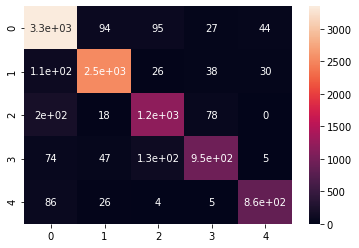

In [26]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [27]:
print('classification_report :\n',classification_report(X_test['target'], predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      3603
           1       0.93      0.92      0.93      2727
           2       0.83      0.80      0.81      1488
           3       0.87      0.79      0.83      1203
           4       0.92      0.88      0.90       979

    accuracy                           0.89     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.89      0.89      0.89     10000



In [28]:
X_test['target']

20631    3
46141    3
97       2
11481    0
7913     2
        ..
42901    0
19682    3
22835    0
6296     1
40389    1
Name: target, Length: 10000, dtype: int64

In [29]:
predictions

array([3, 3, 2, ..., 0, 0, 1])

In [30]:
#CLASS WEIGHTS

In [31]:
from sklearn.utils import class_weight

class_weights= list(class_weight.compute_class_weight('balanced',
                                                      np.unique(X_train['target']),
                                                      X_train['target']))

In [32]:
class_weights

[0.5685856432125089,
 0.707088562842496,
 1.3218770654329148,
 1.7471063550993666,
 2.0075282308657467]

In [33]:
weights= np.ones(X_train.shape[0], dtype='float')

In [34]:
for i, val in enumerate(X_train['target']):
  weights[i]=class_weights[val]

In [35]:
weights

array([0.70708856, 2.00752823, 1.32187707, ..., 0.70708856, 0.56858564,
       0.70708856])

In [36]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=6, objective='multi:softprob', random_state=10, **{"updater": "grow_gpu"})

In [37]:
xgb_clf.fit(train_vectors, X_train['target'], sample_weight=weights)

[08:26:47] WARNING: /workspace/src/learner.cc:194: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, updater='grow_gpu', verbosity=1)

In [38]:
predictions=xgb_clf.predict(test_vectors)

In [39]:
cm = confusion_matrix(X_test['target'], predictions)
print(cm)

[[3110   91  213   84  105]
 [  78 2454   43   61   91]
 [ 108   10 1259  101   10]
 [  35   36  113 1011    8]
 [  45   13    8    6  907]]


In [40]:
print('classification_report :\n',classification_report(X_test['target'], predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      3603
           1       0.94      0.90      0.92      2727
           2       0.77      0.85      0.81      1488
           3       0.80      0.84      0.82      1203
           4       0.81      0.93      0.86       979

    accuracy                           0.87     10000
   macro avg       0.85      0.88      0.86     10000
weighted avg       0.88      0.87      0.88     10000



In [41]:
xgb_clf.save_model('xgb.model')

In [42]:
from google.colab import files
files.download('xgb.model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
predict_text="I have a huge Student Loan"

In [44]:
target={0:'Debt collection', 1:'Mortgage', 2:'Credit card',3:'Bank account or service', 4:'Student loan'}

In [45]:
def scorer(text):
   encoded_text = vectorizer_tf.transform([text])
   score = xgb_clf.predict((encoded_text))
   complaints_category=target.get(int(score))
   
   return complaints_category

In [46]:
!pip install -q gradio
import gradio as gr


     |████████████████████████████████| 1.1MB 17.5MB/s 
     |████████████████████████████████| 215kB 54.2MB/s 
     |████████████████████████████████| 962kB 58.8MB/s 
     |████████████████████████████████| 3.2MB 58.7MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 


In [47]:
output_text = gr.outputs.Textbox()
gr.Interface(scorer,"textbox", output_text, title="Comsumer_Complaints",
             description="INSERT YOUR COMPLAINT").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://35427.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://35427.gradio.app')